<a href="https://colab.research.google.com/github/fransiska-mukti/DeepLearningTasks/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set Up Your Google Colab Notebook

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
missing_values = data.isnull().sum()
print(missing_values)

In [3]:
#Load and Preprocess the Data

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
labels = data['label'].values  # assuming 'label' is your target column
data.drop(['label'], axis=1, inplace=True)  # drop the label from the training data

# Define columns that need one-hot encoding and numerical columns for scaling
categorical_cols = ['proto', 'service', 'state']
numerical_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean']

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply transformations
data_processed = preprocessor.fit_transform(data)


In [5]:
#Prepare Data for LSTM

import numpy as np

# Reshape data for LSTM: [samples, time steps, features]
data_processed = data_processed.toarray()
data_processed = data_processed.reshape(data_processed.shape[0], 1, data_processed.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_processed, labels, test_size=0.2, random_state=42)


In [6]:
#Reshape the Data for CNN

# Assuming data_processed is already loaded and preprocessed from the previous steps

# Reshape data for CNN: [samples, timesteps, features, channels]
# Since the data is 1D, timesteps will be 1 and channels will be the number of features
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))


In [7]:
#Define the CNN Model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_cnn = Sequential()
model_cnn.add(Conv2D(filters=64, kernel_size=(1, 3), activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], 1)))
model_cnn.add(MaxPooling2D(pool_size=(1, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
#Train the CNN Model

history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test), verbose=1)


Epoch 1/10
2192/2192 [==============================] - 46s 19ms/step - loss: 0.1603 - accuracy: 0.9306 - val_loss: 0.1489 - val_accuracy: 0.9324
Epoch 2/10
2192/2192 [==============================] - 38s 18ms/step - loss: 0.1430 - accuracy: 0.9327 - val_loss: 0.1388 - val_accuracy: 0.9328
Epoch 3/10
2192/2192 [==============================] - 40s 18ms/step - loss: 0.1384 - accuracy: 0.9338 - val_loss: 0.1361 - val_accuracy: 0.9315
Epoch 4/10
2192/2192 [==============================] - 40s 18ms/step - loss: 0.1360 - accuracy: 0.9336 - val_loss: 0.1410 - val_accuracy: 0.9322
Epoch 5/10
2192/2192 [==============================] - 40s 18ms/step - loss: 0.1340 - accuracy: 0.9340 - val_loss: 0.1342 - val_accuracy: 0.9312
Epoch 6/10
2192/2192 [==============================] - 50s 23ms/step - loss: 0.1323 - accuracy: 0.9339 - val_loss: 0.1303 - val_accuracy: 0.9336
Epoch 7/10
2192/2192 [==============================] - 40s 18ms/step - loss: 0.1314 - accuracy: 0.9344 - val_loss: 0.1292 -

In [9]:
#Evaluate the CNN Model

loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Loss: {loss_cnn:.4f}")
print(f"Test Accuracy: {accuracy_cnn:.4f}")


Test Loss: 0.1280
Test Accuracy: 0.9347


In [10]:
#Define and Compile the LSTM Model

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
#Train the Model LSTM

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
2192/2192 [==============================] - 13s 5ms/step - loss: 0.1786 - accuracy: 0.9291 - val_loss: 0.1484 - val_accuracy: 0.9320
Epoch 2/10
2192/2192 [==============================] - 11s 5ms/step - loss: 0.1435 - accuracy: 0.9345 - val_loss: 0.1426 - val_accuracy: 0.9319
Epoch 3/10
2192/2192 [==============================] - 11s 5ms/step - loss: 0.1401 - accuracy: 0.9342 - val_loss: 0.1400 - val_accuracy: 0.9315
Epoch 4/10
2192/2192 [==============================] - 11s 5ms/step - loss: 0.1380 - accuracy: 0.9342 - val_loss: 0.1377 - val_accuracy: 0.9322
Epoch 5/10
2192/2192 [==============================] - 12s 5ms/step - loss: 0.1366 - accuracy: 0.9343 - val_loss: 0.1364 - val_accuracy: 0.9318
Epoch 6/10
2192/2192 [==============================] - 11s 5ms/step - loss: 0.1356 - accuracy: 0.9343 - val_loss: 0.1368 - val_accuracy: 0.9328
Epoch 7/10
2192/2192 [==============================] - 9s 4ms/step - loss: 0.1348 - accuracy: 0.9344 - val_loss: 0.1346 - val_acc

In [12]:
#Evaluate the Model LSTM

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1338
Test Accuracy: 0.9332


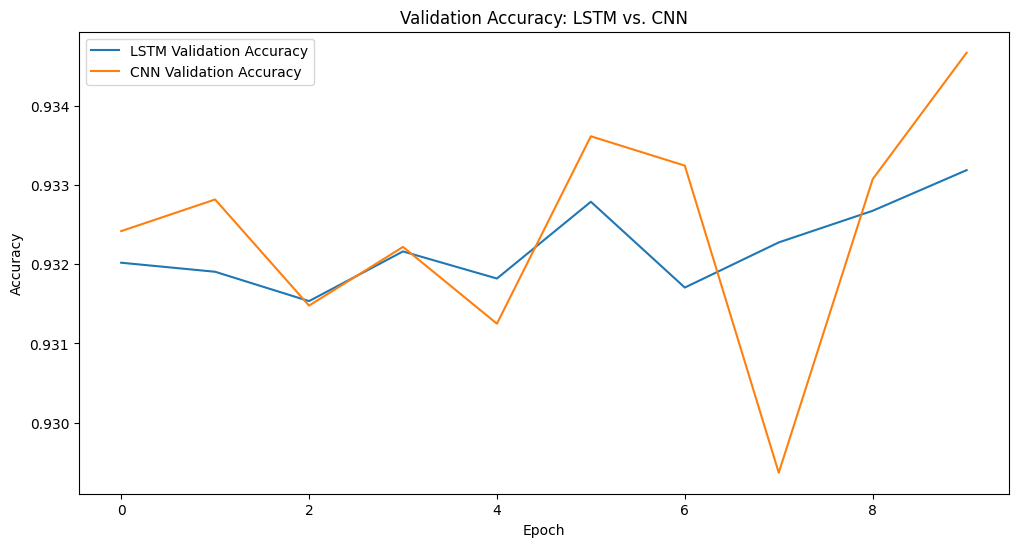

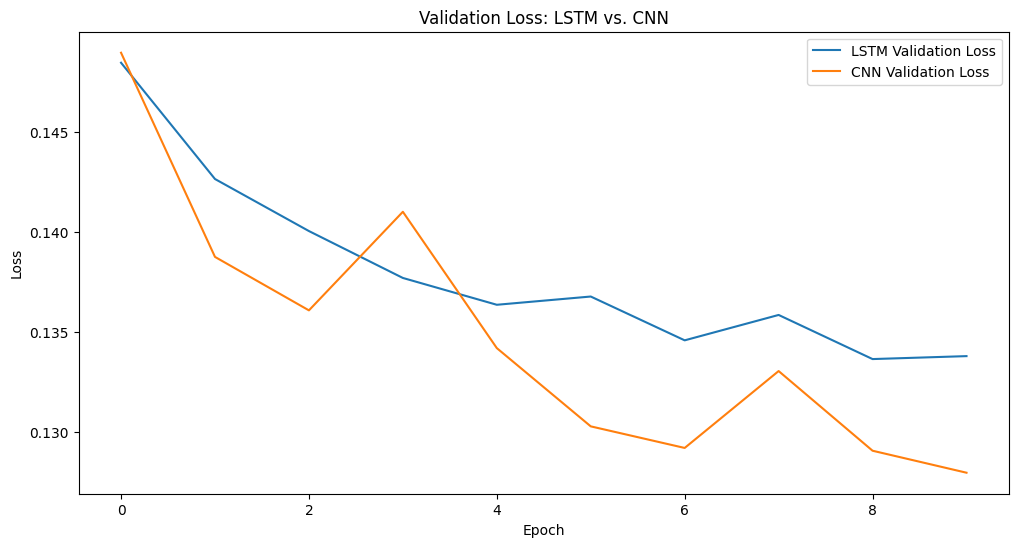

In [14]:
#Compare LSTM and CNN Results

import matplotlib.pyplot as plt

# Assume history_lstm and history_cnn are the history objects from fitting the LSTM and CNN models, respectively

# Plot comparison for accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Validation Accuracy: LSTM vs. CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot comparison for loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.title('Validation Loss: LSTM vs. CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
